In [57]:
def load(file = "./result.txt", omit=False):
    plots = dict()
    maxDuration = 0
    result_file = open(file, 'r')
    for line in result_file:
        if line.startswith("RESULT"):
            line = line[len("RESULT "):].strip()
            parts = line.split()
            measurement = {}
            for part in parts:
                key, value = part.split('=')
                measurement[key] = value

            n = int(round(int(measurement["n"]), -1))
            t = int(measurement["t"])
            if not omit:
                r = int(measurement["r"])
            name = measurement["name"]
            durationNanoseconds = int(measurement["durationNanoseconds"])
            constructorNanoseconds = int(measurement["constructorNanoseconds"])

            if name not in plots:
                plots[name] = list()
                plots[name + " (constructor)"] = list()
            plots[name].append((n, durationNanoseconds / n))
            plots[name + " (constructor)"].append((n, constructorNanoseconds / n))
            maxDuration = max(maxDuration, max(durationNanoseconds, constructorNanoseconds))
    return plots

In [3]:
from pprint import pprint

pprint(load())

{'t12r-1': [(100, 3208.6),
            (1000, 1194.151),
            (10000, 224.6682),
            (100000, 222.37976),
            (1000000, 81.411108),
            (10000000, 126.5144485),
            (100000000, 220.28335046),
            (200000000, 160.10567987)],
 't12r-1 (constructor)': [(100, 11.67),
                          (1000, 45.04),
                          (10000, 11.561),
                          (100000, 12.05211),
                          (1000000, 13.06244),
                          (10000000, 13.5130337),
                          (100000000, 13.10657687),
                          (200000000, 12.954903465)],
 't12r-2': [(100, 5044.0),
            (1000, 962.91),
            (10000, 94.6311),
            (100000, 38.36613),
            (1000000, 45.204953),
            (10000000, 41.1877655),
            (100000000, 59.04964133),
            (200000000, 40.8212539)],
 't12r-2 (constructor)': [(100, 9.8),
                          (1000, 18.425),
             

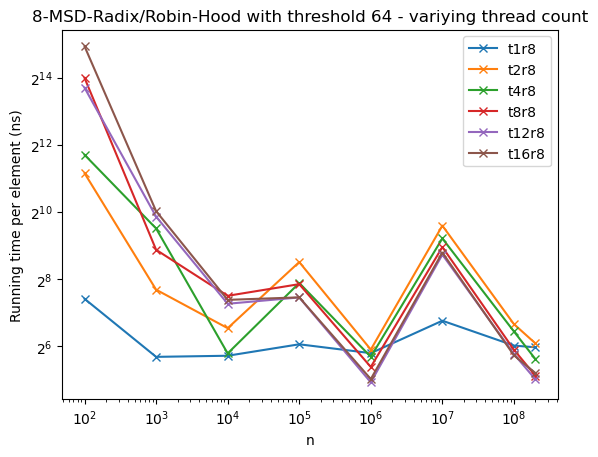

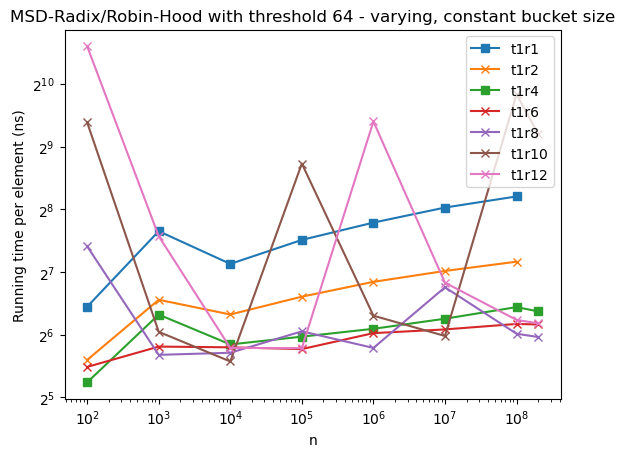

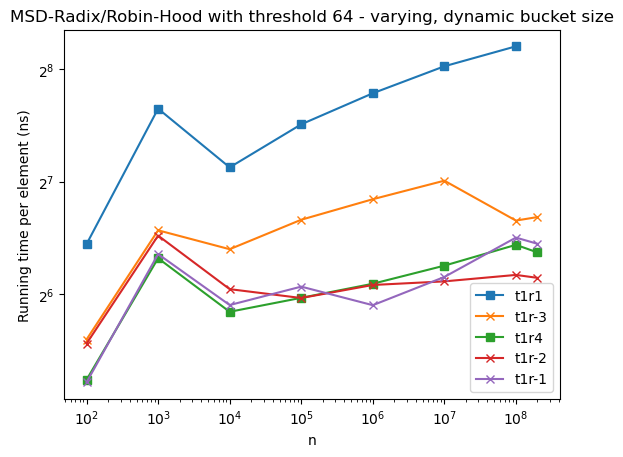

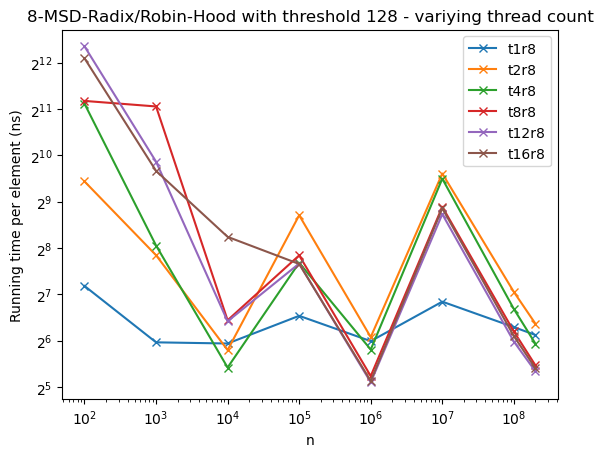

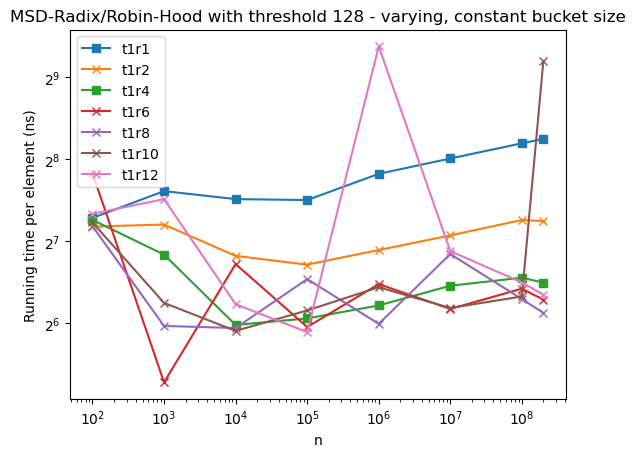

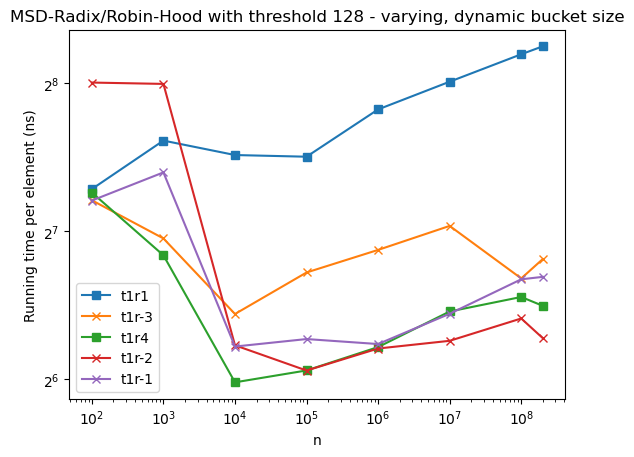

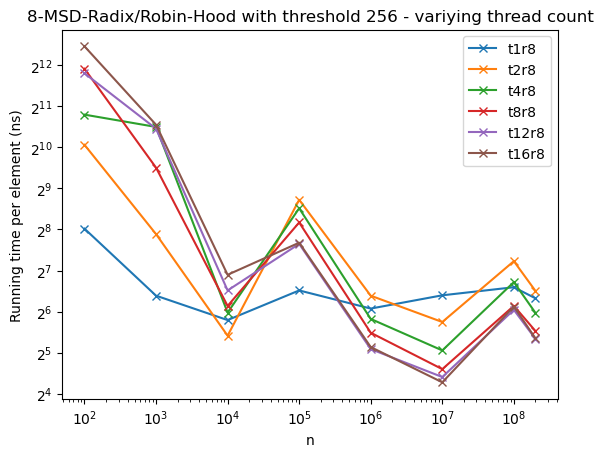

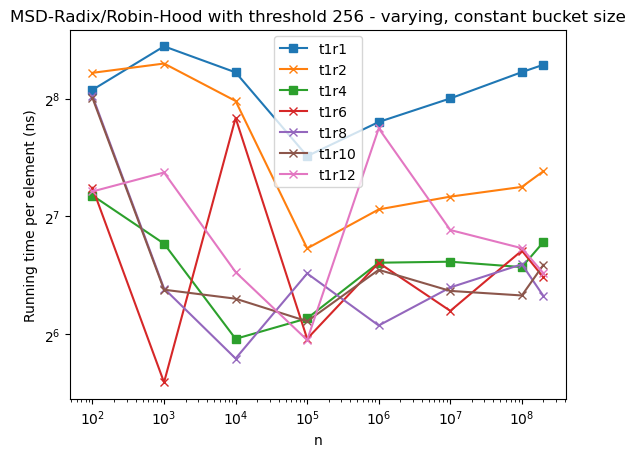

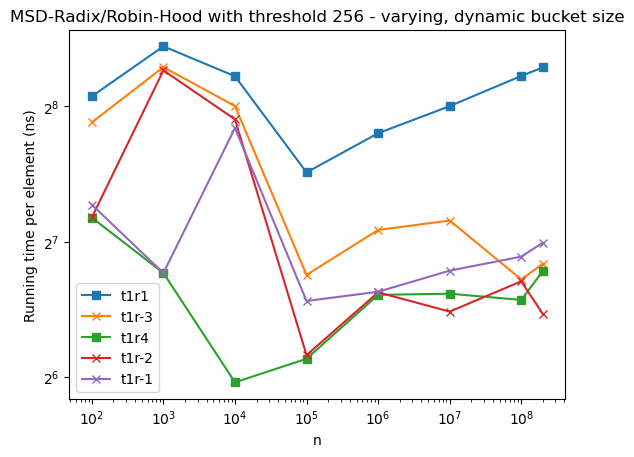

In [54]:
import matplotlib.pyplot as plt

for rh in [64, 128, 256]:
    plots=load(f"./result.rh{rh}.txt")
    fig, ax = plt.subplots()

    # Running-time threads
    for t in [1, 2, 4, 8, 12, 16]:
        name = f"t{t}r8"
        ax.plot(*zip(*plots[name]), label=name, marker='x')
    ax.set_xscale('log')
    ax.set_yscale('log', base=2)
    ax.legend()
    ax.set(xlabel='n', ylabel='Running time per element (ns)', title=f"8-MSD-Radix/Robin-Hood with threshold {rh} - variying thread count")
    fig.savefig(f"plots/thread-r8-rh{rh}.svg")

    fig, ax = plt.subplots()

    # Running time different static radixes
    for r in [1, 2, 4, 6, 8, 10, 12]:
        name = f"t1r{r}"
        ax.plot(*zip(*plots[name]), label=name, marker='s' if r == 1 or r == 4 else 'x')
    ax.set_xscale('log')
    ax.set_yscale('log', base=2)
    ax.legend()
    ax.set(xlabel='n', ylabel='Running time per element (ns)', title=f"MSD-Radix/Robin-Hood with threshold {rh} - varying, constant bucket size")
    fig.savefig(f"plots/constant-r-rh{rh}.svg")


    fig, ax = plt.subplots()
    for r in [1,-3, 4, -2, -1]:
        name = f"t1r{r}"
        ax.plot(*zip(*plots[name]), label=name, marker='s' if r == 1 or r == 4 else 'x')
    ax.set_xscale('log')
    ax.set_yscale('log', base=2)
    ax.legend()
    ax.set(xlabel='n', ylabel='Running time per element (ns)', title=f"MSD-Radix/Robin-Hood with threshold {rh} - varying, dynamic bucket size")
    fig.savefig(f"plots/dynamic-r-rh{rh}.svg")

    plt.show()


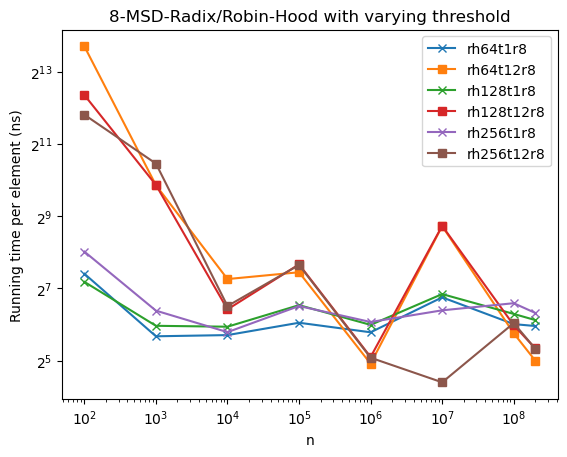

In [47]:
plots=[load(f"./result.rh{rh}.txt") for rh in [64, 128, 256]]
fig, ax = plt.subplots()

# Threshold comparison
for i, rh in enumerate([64, 128, 256]):
    for t in [1, 12]:
        name = f"t{t}r8"
        ax.plot(*zip(*plots[i][name]), label=f"rh{rh}{name}", marker=('x' if t == 1 else 's'))
ax.set_xscale('log')
ax.set_yscale('log', base=2)
ax.legend()
ax.set(xlabel='n', ylabel='Running time per element (ns)', title=f"8-MSD-Radix/Robin-Hood with varying threshold")
fig.savefig(f"plots/varying-rh.svg")

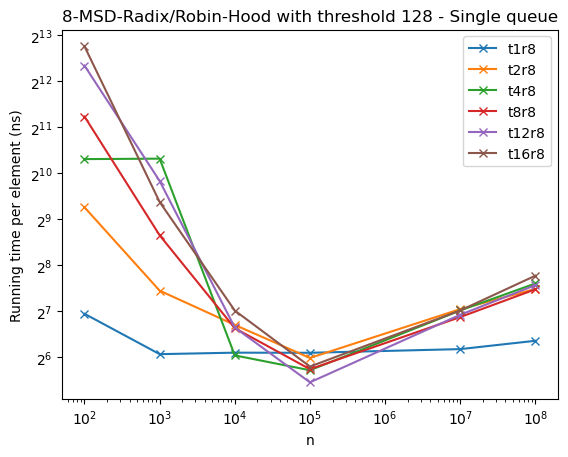

In [63]:
plots=load(f"./result.rsh2.rh28.txt", omit=True)
fig, ax = plt.subplots()

# Running-time threads
for t in [1, 2, 4, 8, 12, 16]:
    name = f"t{t}r8"
    ax.plot(*zip(*plots[f"t{t}"]), label=name, marker='x')
ax.set_xscale('log')
ax.set_yscale('log', base=2)
ax.legend()
ax.set(xlabel='n', ylabel='Running time per element (ns)', title=f"8-MSD-Radix/Robin-Hood with threshold 128 - Single queue")
fig.savefig(f"plots/old-thread-r8-rh128.svg")

In [ ]:
fig, ax = plt.subplots()

for t in [1, 2, 4, 8, 12, 16]:
    name = f"t{t}r8"
    ax.plot(*zip(*plots[name]), label=name, marker='x')
    ax.set_xscale('log')
    ax.legend()

In [ ]:
fig, axs = plt.subplots(len(plots))

for i, t in enumerate(plots):
    if len(plots) > 1:
        axs[i].set_title(f"#p={t}")
        for name in plots[t]:
            axs[i].plot(*zip(*plots[t][name]), label=name, marker='x')
            axs[i].plot(*zip(*plots[t][name]), label=name + " (constructor)", marker='+')
            axs[i].set_xscale('log')
    else:
        axs.plot(*zip(*plots[t][name]), label=name, marker='x')
        axs.plot(*zip(*plots[t][name]), label=name + " (constructor)", marker='+')
        axs.set_xscale('log')

if len(plots) > 1:
    for ax in axs.flat:
        ax.set(xlabel='n', ylabel='Running time per element (ns)')
        ax.legend()
else:
    axs.set(xlabel='n', ylabel='Running time per element (ns)')
    axs.legend()

plt.tight_layout()

plt.savefig("plot.pdf")